1.Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

2.Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("iris.csv")
df.head(10)

In [ ]:
X=df.iloc[:,0:4]
y=df.iloc[:,-1]
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)
X_test

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica'],
      dtype='<U10')

In [ ]:
model.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_predicted)

In [ ]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
# classification report for precision, recall f1-score and accuracy
cl_report=classification_report(y_test,y_predicted)

In [ ]:
cl_report

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        11\n  Versicolor       1.00      0.92      0.96        13\n   Virginica       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [ ]:
          precision    recall  f1-score   support\n\n
Setosa       1.00      1.00      1.00        11\n  
Versicolor   1.00      0.92      0.96        13\n   
Virginica    0.86      1.00      0.92         6\n\n    
accuracy                           0.97        30\n   
macro avg       0.95      0.97      0.96        30\n
weighted avg    0.97      0.97      0.97        30\n


https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

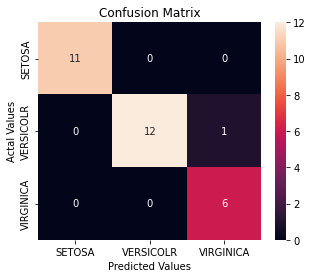

In [ ]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
def accuracy_cm(tp,fn,fp,tn):
  return (tp+tn)/(tp+fp+tn+fn)

def precision_cm(tp,fn,fp,tn):
  return  tp/(tp+fp)

def recall_cm(tp,fn,fp,tn):
  return tp/(tp+fn)

def f1_score(tp,fn,fp,tn):
  return (2/((1/recall_cm(tp,fn,fp,tn))+precision_cm(tp,fn,fp,tn)))

def error_rate_cm(tp,fn,fp,tn):
  return 1-accuracy_cm(tp,fn,fp,tn)

In [ ]:
#For Virginica
tp = cm[2][2]
fn = cm[2][0]+cm[2][1]
fp = cm[0][2]+cm[1][2]
tn = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]

print("For Virginica \n")
print("Accuracy    : ",accuracy_cm(tp,fn,fp,tn))
print("Precision   : ",precision_cm(tp,fn,fp,tn))
print("Recall      : ",recall_cm(tp,fn,fp,tn))
print("F1-Score    : ",f1_score(tp,fn,fp,tn))
print("Error rate  : ",error_rate_cm(tp,fn,fp,tn))